<a href="https://colab.research.google.com/github/Witcape/PSO/blob/main/Final_Corrected_LLM_Quasi_Initialisation_with_LLM_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Installing LLM

In [1]:
# !pip install accelerate
# import accelerate

In [2]:
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.78 numpy==1.23.4 --force-reinstall --upgrade --no-cache-dir --verbose
!pip install huggingface_hub
!pip install llama-cpp-python==0.1.78
!pip install numpy==1.23.4

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.2 MB/s eta 0:00:00
  Running command pip subprocess to install build dependencies
  Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 5.4 MB/s eta 0:00:00
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 5.8 MB/s eta 0:00:00
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 19.8 MB/s eta 0:00:00
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 17.5 MB/s eta 0:00:00
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 4.4 MB/s eta 0:00:00
    Using cached wheel-0.43.0-py3-none-any.whl (65 kB)
    Creating /tmp/pip-build-env-dpu1844f/overlay/local/bin
    changing mode of /tmp/pip-build-env-dpu1844f/overlay/local/bin/ninja to 755
    changing mode of /tmp/pip-build-env-dpu1844f/overlay/local/bin/wheel to 755
    ch

In [3]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGML"
model_basename = "llama-2-13b-chat.ggmlv3.q5_1.bin"

In [4]:
from huggingface_hub import hf_hub_download
from llama_cpp import Llama
import matplotlib.pyplot as plt

In [5]:
model_path = hf_hub_download(repo_id=model_name_or_path, filename=model_basename)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.ggmlv3.q5_1.bin:   0%|          | 0.00/9.76G [00:00<?, ?B/s]

In [6]:
# GPU
lcpp_llm = None
lcpp_llm = Llama(
    model_path=model_path,
    n_threads=2, # CPU cores
    n_batch=512, # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    n_gpu_layers=32 # Change this value based on your model and your GPU VRAM pool.
    )

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | VSX = 0 | 


In [7]:
lcpp_llm.params.n_gpu_layers

32

### Generating Population with Quasi Initialisation

In [22]:
method =' Quasi-Random Sequence'
prompt = f"generate 20 numbers between -10 to 10 by using {method}, only 2 decimal places, "
prompt_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

USER: {prompt}

ASSISTANT:
'''

In [23]:
response=lcpp_llm(prompt=prompt_template, max_tokens=256, temperature=0.5, top_p=0.95,
                  repeat_penalty=1.2, top_k=150,
                  echo=True)

Llama.generate: prefix-match hit


In [24]:
print(response)

{'id': 'cmpl-305a6a1d-5dea-4332-a9d9-823266fb971c', 'object': 'text_completion', 'created': 1719906163, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': 'SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\nUSER: generate 20 numbers between -10 to 10 by using  Quasi-Random Sequence, only 2 decimal places, \n\nASSISTANT:\n\nHere is your list of 20 quasi-random numbers between -10 and 10 with two decimal places:\n\n1. -8.47\n2. -5.93\n3. -2.76\n4. 1.38\n5. 3.65\n6. 5.57\n7. 7.28\n8. 8.63\n9. 9.54\n10. 10.17\n11. -0.39\n12. -0.72\n13. -1.01\n14. -1.26\n15. -1.48\n16. -1.65\n17. -1.83\n18. -2.04\n19. -2.21\n20. -2.37\n\nPlease note that these numbers are generated using a Quasi-Random Sequence, which means they may not be perfectly uniform or random, but should still provide a good representation of the range you req

In [25]:
import re

text_response = response['choices'][0]['text']

# Use a regular expression to find all numbers in the response
numbers = re.findall(r'-?\d+\.\d+', text_response)

# Convert the numbers to floats
numbers = [float(num) for num in numbers]

Quasi_Random_Sequence_Initialisation = numbers
print(Quasi_Random_Sequence_Initialisation)

[-8.47, -5.93, -2.76, 1.38, 3.65, 5.57, 7.28, 8.63, 9.54, 10.17, -0.39, -0.72, -1.01, -1.26, -1.48, -1.65, -1.83, -2.04, -2.21, -2.37]


### PSO Parameters

In [26]:
!pip install pyswarms
import numpy as np
import pyswarms as ps
# from pso.cost_functions import sphere

In [27]:
# initial_position = np.array(numbers)

# def objective_function(x):
#     return np.sum(x**2)

# bounds = (np.array([-10]), np.array([10]))

# options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# optimizer = ps.single.GlobalBestPSO(n_particles=len(numbers), dimensions=1, options=options, bounds=bounds, init_pos=initial_position.reshape(-1, 1))

# best_cost, best_pos = optimizer.optimize(objective_function, iters=100)

# print('Best position:', best_pos)
# print('Best objective:', best_cost)


In [28]:
def sphere(x):
    return sum(x**2)

In [29]:
CostFunction = sphere  #
nVar = 10  # Number of Decision Variables
VarSize = (nVar,)  # Size of Decision Variables Matrix
VarMin = -10  # Lower Bound of Variables
VarMax = 10  # Upper Bound of Variables

In [30]:
MaxIt = 20  # Maximum Number of Iterations
nPop = np.size(numbers)  # Population Size (Swarm Size)
if(nPop > 20):
  numbers = numbers[:19]
print(nPop)

20


In [31]:
w = 1  # Inertia Weight
wdamp = 0.99  # Inertia Weight Damping Ratio
c1 = 1.5  # Personal Learning Coefficient
c2 = 2.0  # Global Learning Coefficient

In [32]:
# Velocity Limits                        HOWW. ASK BHAIYA ABOUT THIS
VelMax = 0.1 * (VarMax - VarMin)
VelMin = -VelMax

In [33]:
particles = []

for i in range(nPop):
    position = np.array([Quasi_Random_Sequence_Initialisation[i]] * nVar)
    velocity = np.zeros(VarSize)
    cost = CostFunction(position)
    best_position = position.copy()
    best_cost = cost
    particles.append({
        'Position': position,
        'Velocity': velocity,
        'Cost': cost,
        'Best': {
            'Position': best_position,
            'Cost': best_cost
        }
    })
print(np.size(particles))


20


In [34]:
GlobalBest = {'Position': None, 'Cost': np.inf}

for p in particles:
    if p['Cost'] < GlobalBest['Cost']:
        GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}

BestCost = np.zeros(MaxIt)

### Running PSO

In [35]:
w_values = []
g_values = []

for it in range(MaxIt):
    for p in particles:
        # Update Velocity
        r1 = np.random.rand(*VarSize)
        r2 = np.random.rand(*VarSize)
        p['Velocity'] = (
            w * p['Velocity']
            + c1 * r1 * (p['Best']['Position'] - p['Position'])
            + c2 * r2 * (GlobalBest['Position'] - p['Position'])
        )

        # Apply Velocity Limits
        p['Velocity'] = np.maximum(p['Velocity'], VelMin)
        p['Velocity'] = np.minimum(p['Velocity'], VelMax)

        # Update Position
        p['Position'] += p['Velocity']

        # Velocity Mirror Effect
        IsOutside = (p['Position'] < VarMin) | (p['Position'] > VarMax)
        p['Velocity'][IsOutside] = -p['Velocity'][IsOutside]

        # Apply Position Limits
        p['Position'] = np.maximum(p['Position'], VarMin)
        p['Position'] = np.minimum(p['Position'], VarMax)

        # Evaluation
        p['Cost'] = CostFunction(p['Position'])

        # Update Personal Best
        if p['Cost'] < p['Best']['Cost']:
            p['Best']['Position'] = p['Position'].copy()
            p['Best']['Cost'] = p['Cost']

            # Update Global Best
            if p['Best']['Cost'] < GlobalBest['Cost']:  # tell best cost using roullete wheel. LLM will check for global best
                GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']} # tell best cost using roullete wheel

    BestCost[it] = GlobalBest['Cost']

    print(f"Iteration {it+1}: Best Cost = {BestCost[it]}")

    prompt = f"generate one positive number that is smaller than {w}. Don't write anything else, just that number"
    w_finder_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

    USER: {prompt}

    ASSISTANT:
    '''

    w_response = lcpp_llm(prompt=w_finder_template, max_tokens=256, temperature=0.5, top_p=0.95,
                          repeat_penalty=1.2, top_k=150,
                          echo=True)

    g_values.append(GlobalBest['Cost'])
    BestCost[it] = GlobalBest['Cost']

    text_response = w_response['choices'][0]['text']
    value = re.findall(r'-?\d+\.\d+', text_response)
    value = [float(num) for num in value]

    value = value[np.size(value) - 1]
    print(f'w{it+1} = {value}')
    w_values.append(w)
    w = value

w_values.append(w)
print(w_values)

Iteration 1: Best Cost = 1.521


Llama.generate: prefix-match hit


w1 = 0.9
Iteration 2: Best Cost = 0.4813601160713724


Llama.generate: prefix-match hit


w2 = 0.85
Iteration 3: Best Cost = 0.31518905673332875


Llama.generate: prefix-match hit


w3 = 0.79
Iteration 4: Best Cost = 0.31518905673332875


Llama.generate: prefix-match hit


w4 = 0.68
Iteration 5: Best Cost = 0.31518905673332875


Llama.generate: prefix-match hit


w5 = 0.67
Iteration 6: Best Cost = 0.31518905673332875


Llama.generate: prefix-match hit


w6 = 0.59
Iteration 7: Best Cost = 0.31518905673332875


Llama.generate: prefix-match hit


w7 = 0.48
Iteration 8: Best Cost = 0.31518905673332875


Llama.generate: prefix-match hit


w8 = 0.39
Iteration 9: Best Cost = 0.31518905673332875


Llama.generate: prefix-match hit


w9 = 0.27
Iteration 10: Best Cost = 0.3010695184065162


Llama.generate: prefix-match hit


w10 = 0.19
Iteration 11: Best Cost = 0.3010695184065162


Llama.generate: prefix-match hit


w11 = 0.18
Iteration 12: Best Cost = 0.13893191948356332


Llama.generate: prefix-match hit


w12 = 0.17
Iteration 13: Best Cost = 0.10661852588296461


Llama.generate: prefix-match hit


w13 = 0.169
Iteration 14: Best Cost = 0.102800238443026


Llama.generate: prefix-match hit


w14 = 0.123
Iteration 15: Best Cost = 0.08573685532947223


Llama.generate: prefix-match hit


w15 = 0.122
Iteration 16: Best Cost = 0.048051251456250575


Llama.generate: prefix-match hit


w16 = 0.119
Iteration 17: Best Cost = 0.030592446721797926


Llama.generate: prefix-match hit


w17 = 0.118
Iteration 18: Best Cost = 0.02962456620722725


Llama.generate: prefix-match hit


w18 = 0.097
Iteration 19: Best Cost = 0.028889582703911478


Llama.generate: prefix-match hit


w19 = 0.083
Iteration 20: Best Cost = 0.025028426135790267


Llama.generate: prefix-match hit


w20 = 0.079
[1, 0.9, 0.85, 0.79, 0.68, 0.67, 0.59, 0.48, 0.39, 0.27, 0.19, 0.18, 0.17, 0.169, 0.123, 0.122, 0.119, 0.118, 0.097, 0.083, 0.079]


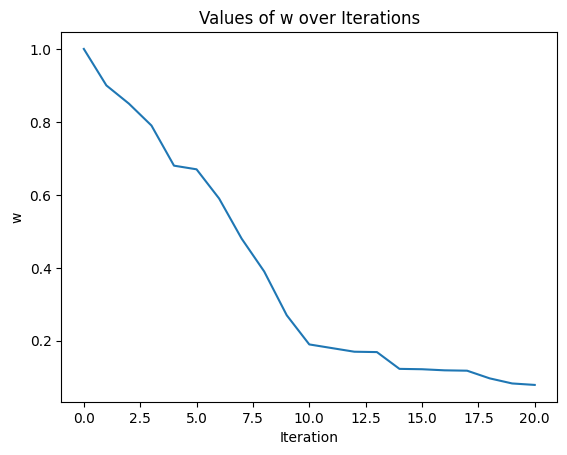

In [36]:
plt.plot(w_values)
plt.xlabel("Iteration")
plt.ylabel("w")
plt.title("Values of w over Iterations")
plt.show()

[1.521, 0.4813601160713724, 0.31518905673332875, 0.31518905673332875, 0.31518905673332875, 0.31518905673332875, 0.31518905673332875, 0.31518905673332875, 0.31518905673332875, 0.3010695184065162, 0.3010695184065162, 0.13893191948356332, 0.10661852588296461, 0.102800238443026, 0.08573685532947223, 0.048051251456250575, 0.030592446721797926, 0.02962456620722725, 0.028889582703911478, 0.025028426135790267]


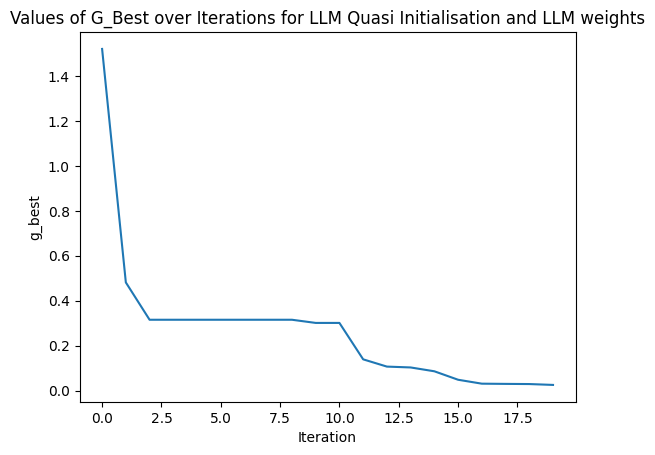

In [38]:
G_values_Quasi_weights = g_values
print(G_values_Quasi_weights)

plt.plot(G_values_Quasi_weights)
plt.xlabel("Iteration")
plt.ylabel("g_best")
plt.title("Values of G_Best over Iterations for LLM Quasi Initialisation and LLM weights")
plt.show()